# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data=data, index=labels)
print(df)

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
description = df.describe()
print("Description:\n{description}\n\nInfo:\n".format(description=description))
df.info()

Description:
            age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000

Info:

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
first_3_head = df.head(3)
first_3_iloc = df.iloc[:3]

print("Using head:\n{head}\n\nUsing iloc:\n{iloc}".format(head=first_3_head,
                                                          iloc=first_3_iloc))

Using head:
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2

Using iloc:
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df.loc[:,['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df.loc[:, ['animal', 'age']].iloc[[3, 4, 8], :]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df[df['visits'] > 3]

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df[np.isnan(df['age'])]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df[(df['animal'] == 'cat') & (df['age'] < 3)] 

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df[(df['age'] >= 2) & (df['age'] <= 4)] 

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.at['f', 'age'] = 1.5
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
sum_builtin = df['visits'].sum(axis=0)
sum_np = np.sum(df['visits'])

print("Built-In:\t{bi}\nNumpy:\t\t{np}".format(bi=sum_builtin, np=sum_np))

Built-In:	19
Numpy:		19


```Calculate the mean age for each different animal in `df`.```

In [0]:
mean_ages = {}
for anml in df['animal'].drop_duplicates():
  mean_ages[anml] = df['age'][df['animal'] == anml].mean()
print("Mean ages:\n{}".format(mean_ages))

Mean ages:
{'dog': 5.0, 'snake': 2.5, 'cat': 2.3333333333333335}


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
print("{df}\n\n".format(df=df))
df = df.append(pd.Series(data={'animal': 'dog', 'age': 8, 'visits': 2,
                            'priority': 'no'}, name = 'k'))
print("{df}\n\n".format(df=df))
df.drop(df.tail(1).index, inplace=True)
print("{df}\n\n".format(df=df))

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1
k  8.0    dog       no       2


   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7

```Count the number of each type of animal in `df`.```

In [0]:
counts = {}
for anml in df['animal'].drop_duplicates():
  counts[anml] = (df['animal'] == anml).sum() # True = 1, False = 0
print("Number counts:\n{}".format(counts))

Number counts:
{'dog': 4, 'snake': 2, 'cat': 4}


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
df = df.sort_values(['age', 'visits'], ascending=[False, True])
df

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,1.5,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df['priority'] = df['priority'].map({'yes' : 'true', 'no' : 'false'})
df

,age,animal,priority,visits
i,7.0,dog,false,2
e,5.0,dog,false,2
g,4.5,snake,false,1
j,3.0,dog,false,1
b,3.0,cat,true,3
a,2.5,cat,true,1
f,1.5,cat,false,3
c,0.5,snake,false,2
h,NaN,cat,true,1
d,NaN,dog,true,3


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df['animal'] = df['animal'].map(lambda anml : 'python' if anml == 'snake' else anml)
df

,age,animal,priority,visits
i,7.0,dog,false,2
e,5.0,dog,false,2
g,4.5,python,false,1
j,3.0,dog,false,1
b,3.0,cat,true,3
a,2.5,cat,true,1
f,1.5,cat,false,3
c,0.5,python,false,2
h,NaN,cat,true,1
d,NaN,dog,true,3


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
table = df.pivot_table(values='age', index='animal', columns='visits', aggfunc=np.mean)
table

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
random_age = lambda : np.random.randint(20, 65 + 1)
random_skill = lambda : np.random.normal(loc=0.5, scale=0.3)
random_height = lambda : 1.5 + 0.01 * np.random.randint(0, 50 + 1)

l = 1000
df2 = pd.DataFrame(data= {'age' : [random_age() for i in range(l)],
                      'skill' : [random_skill() for i in range(l)],
                      'height' : [random_height() for i in range(l)]})
df2.head()

,age,height,skill
0,37,1.75,1.126027
1,34,1.93,0.664847
2,21,1.56,1.334078
3,42,1.99,0.577519
4,55,1.72,1.132970


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
calc_salary = lambda series : 1000 * ((series['age'] ** 2) / 1000 + 1.7*series['skill'] + 0.4*np.exp(-(series['height'] - 1.7)**2))
salary_column = [calc_salary(df2.loc[i]) for i in df2.index]
df2.insert(len(df2.columns), 'salary', salary_column)
df2.head(5)

,age,height,skill,salary
0,37,1.75,1.126027,3682.246325
1,34,1.93,0.664847,2665.629794
2,21,1.56,1.334078,3101.168718
3,42,1.99,0.577519,3113.517373
4,55,1.72,1.132970,5350.888441


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
# by age
df2.groupby('age').size()


age
20    21
21    23
22    31
23    34
24    23
25    29
26    21
27    23
28    26
29    19
30    23
31    24
32    22
33    18
34    16
35    12
36    19
37    18
38    33
39    24
40    19
41    15
42    20
43    30
44    26
45    19
46    19
47    22
48    19
49    17
50    21
51    15
52    25
53    21
54    24
55    19
56    15
57    23
58    25
59    24
60    19
61    20
62    28
63    19
64    15
65    22
dtype: int64

In [0]:
df2.groupby('age')['salary'].mean()

age
20    1653.985797
21    1772.674997
22    1869.987890
23    1918.347067
24    1995.921934
25    1779.484798
26    1829.938071
27    2043.038144
28    2230.209197
29    1982.193832
30    2205.911859
31    2325.094531
32    2238.720017
33    2525.743023
34    2374.145683
35    2348.400660
36    2278.766117
37    2682.057605
38    2673.489548
39    2747.339579
40    2791.915357
41    2704.475121
42    2949.032631
43    2980.953795
44    3066.759771
45    3292.918884
46    3540.864142
47    3370.680918
48    3575.327871
49    3861.222215
50    3860.623966
51    3902.878869
52    4065.649639
53    4112.538893
54    4104.437678
55    4308.037293
56    4458.565716
57    4519.143008
58    4598.339339
59    4692.750246
60    4938.455586
61    5037.785579
62    4837.414648
63    5116.225776
64    5410.330650
65    5638.961980
Name: salary, dtype: float64

In [0]:
df2.groupby('age')['height'].max()

age
20    2.00
21    2.00
22    2.00
23    2.00
24    1.96
25    1.99
26    1.97
27    1.98
28    1.99
29    1.97
30    2.00
31    2.00
32    1.95
33    2.00
34    1.93
35    1.99
36    1.99
37    1.97
38    2.00
39    2.00
40    1.97
41    1.95
42    2.00
43    1.98
44    1.94
45    2.00
46    1.97
47    2.00
48    2.00
49    1.99
50    1.98
51    2.00
52    2.00
53    2.00
54    1.99
55    2.00
56    1.99
57    1.98
58    1.98
59    2.00
60    2.00
61    2.00
62    2.00
63    1.98
64    1.98
65    1.96
Name: height, dtype: float64

In [0]:
df2.groupby(df2['age'] // 10)['salary'].mean()

age
2    1909.102456
3    2455.289441
4    3200.618466
5    4275.393025
6    5141.905617
Name: salary, dtype: float64

In [0]:
df2.groupby(df2['age'] // 10)['height'].max()

age
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
Name: height, dtype: float64

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
gb = df2.groupby('age')
res = gb['salary'].mean() / gb['height'].sum()

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

AxesSubplot(0.125,0.125;0.775x0.755)


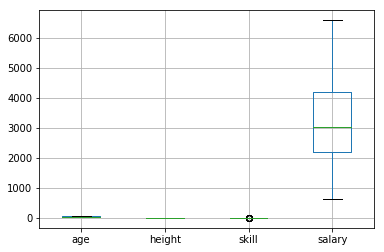

In [0]:
plot = pd.DataFrame.boxplot(df2)
print(plot)

```Save the result as a csv```

In [0]:
res.to_csv("result.csv")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = "serif"

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [0]:
oldest = min(df['YearBuilt'])
df[df['YearBuilt'] == oldest]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1349,1350,70,50.0,5250,8,5,1872,1987,0.0,259,...,0,54,20,0,0,0,0,12,2008,122000


In [0]:
max(df['SalePrice'])

755000

In [0]:
df['LotArea'].mean()

10516.828082191782

In [0]:
df['LotArea'].median()

9478.5

In [0]:
have = len(df[df['Fireplaces'] > 0])
dont_have = len(df[df['Fireplaces'] == 0])
'having is more common' if have > dont_have else 'not having is more common'

'having is more common'

In [0]:
df[df['PoolArea'] > 0]['SalePrice'].mean()

288138.5714285714

''

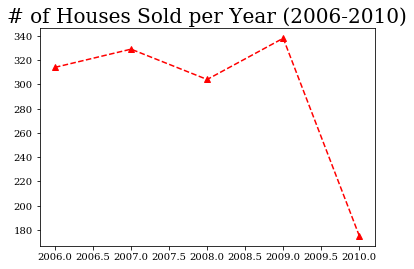

In [0]:
plt.plot(df.groupby('YrSold').size(), 'r^--')
plt.title('# of Houses Sold per Year (2006-2010)', size=20)
;

(array([6., 0., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([  1.,  83., 165., 247., 329., 411., 493., 575., 657., 739., 821.]),
 <a list of 10 Patch objects>)

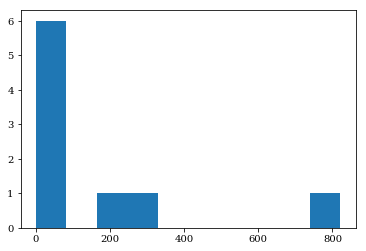

In [0]:
plt.hist(df.groupby('OverallCond').size())

In [0]:
gb = df.groupby('Fireplaces')
print(gb['SalePrice'].mean())
print(2019 - gb['YearBuilt'].mean())
print(gb['FullBath'].nunique())

Fireplaces
0    141331.482609
1    211843.909231
2    240588.539130
3    252000.000000
Name: SalePrice, dtype: float64
Fireplaces
0    54.781159
1    39.150769
2    54.347826
3    38.400000
Name: YearBuilt, dtype: float64
Fireplaces
0    4
1    4
2    4
3    2
Name: FullBath, dtype: int64


In [0]:
gb2 = df[df['MSSubClass'] > 60].groupby(df['MSSubClass'] % 20 == 0)

In [0]:
gb2['OverallQual'].agg((np.mean, np.max, np.min, np.std))

,mean,amax,amin,std
MSSubClass,,,,
False,5.556180,10,3,1.193055
True,6.389908,9,4,1.111021


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df.insert(0, 'LotAreaMetric', 0.092903 * df['LotArea'])

In [0]:
df.insert(0, 'ttlSF', df['1stFlrSF'] + df['2ndFlrSF'])

In [0]:
df.insert(0, 'garage_sqrt', df['GarageArea'] ** 0.5)

In [0]:
df.insert(0, 'room_area', df['LotArea'] / (df['BedroomAbvGr'] + 1))

In [0]:
averages = df.groupby('YearBuilt')['LotArea'].mean() + 1e-5
df.insert(0, 'AreaPerPersonInYear', df['LotArea'] / np.array([averages[year] for year in df['YearBuilt']]))

In [0]:
df.insert(0, 'AreaRank', df['LotArea'].rank(method='dense'))

In [0]:
df = pd.get_dummies(df, columns=['LotConfig'])

In [0]:
df.head()

,AreaRank,AreaPerPersonInYear,room_area,garage_sqrt,ttlSF,LotAreaMetric,Id,MSSubClass,LotFrontage,LotArea,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,328.0,0.874874,2112.5,23.409400,1710,785.03035,1,60,65.0,8450,...,0,0,2,2008,208500,0,0,0,0,1
1,499.0,1.043942,2400.0,21.447611,1262,891.86880,2,20,80.0,9600,...,0,0,5,2007,181500,0,0,1,0,0
2,703.0,1.080951,2812.5,24.657656,1786,1045.15875,3,60,68.0,11250,...,0,0,9,2008,223500,0,0,0,0,1
3,490.0,1.045441,2387.5,25.337719,1717,887.22365,4,70,60.0,9550,...,0,0,2,2006,140000,1,0,0,0,0
4,926.0,1.739272,2852.0,28.913665,2198,1324.79678,5,60,84.0,14260,...,0,0,12,2008,250000,0,0,1,0,0


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
features = ['LotAreaMetric', 'ttlSF', 'garage_sqrt', 'room_area',
            'AreaPerPersonInYear', 'AreaRank',
            'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
            'LotConfig_FR3', 'LotConfig_Inside']

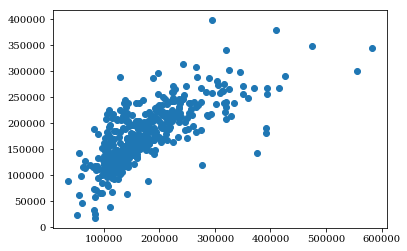

In [0]:
feature_data = df[features]
target = df["SalePrice"]

feature_train, feature_test, target_train, target_test = train_test_split(feature_data, target, test_size=0.3)

StandardScaler(feature_train)
StandardScaler(target_train)

lin_regressor = LinearRegression()
lin_regressor.fit(feature_train, target_train) 

price_test_fit = lin_regressor.predict(feature_test)
price = np.array(target_test)
price_model = np.array(price_test_fit)

plt.scatter(price,price_model)

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
features = features[:6]

In [0]:
df.insert(0, 'LotAreaMetric', 0.092903 * df['LotArea'])
df.insert(0, 'ttlSF', df['1stFlrSF'] + df['2ndFlrSF'])
df.insert(0, 'garage_sqrt', df['GarageArea'] ** 0.5)
df.insert(0, 'room_area', df['LotArea'] / (df['BedroomAbvGr'] + 1))
averages = df.groupby('YearBuilt')['LotArea'].mean() + 1e-5
df.insert(0, 'AreaPerPersonInYear', df['LotArea'] / np.array([averages[year] for year in df['YearBuilt']]))
df.insert(0, 'AreaRank', df['LotArea'].rank(method='dense'))

In [0]:
new_features = []
for feature in features:
  df.insert(0, r"{}^2".format(feature), df[feature] ** 2)
  df.insert(0, r"{}^3".format(feature), df[feature] ** 3)
  
  new_features.append(feature)
  new_features.append(r"{}^2".format(feature))
  new_features.append(r"{}^3".format(feature))

In [0]:
feature_data = df[new_features]
target = df["SalePrice"]

feature_train, feature_test, target_train, target_test = train_test_split(feature_data, target, test_size=0.3)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.850419e-29
  overwrite_a=True).T
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.700837e-29
  overwrite_a=True).T
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.155126e-28
  overwrite_a=True).T
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.540167e-28
  overwrite_a=True).T
/usr/local/lib/python2.7

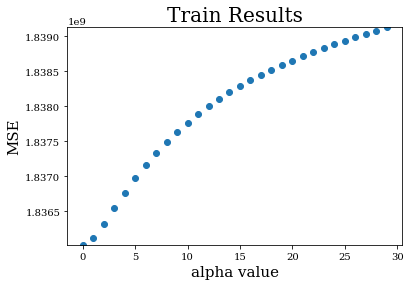

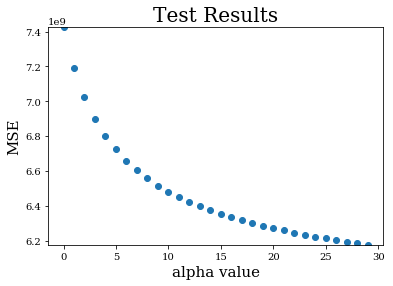

In [0]:
poly = PolynomialFeatures(degree=1)

feature_train_pol = poly.fit_transform(feature_train)
feature_test_pol = poly.fit_transform(feature_test)
score_train = np.zeros(30)
score_test = np.zeros(30)

for i in range(30):
  ridge_reg = Ridge(alpha=i , max_iter = 10000)
  ridge_reg.fit(feature_train_pol, target_train)
  price_train_fit = ridge_reg.predict(feature_train_pol)
  price_test_fit = ridge_reg.predict(feature_test_pol)
  score_train[i] = mean_squared_error(price_train_fit, target_train) # we chose the loss function to be the R^2 value
  score_test[i] = mean_squared_error(price_test_fit, target_test)
plt.scatter(range(30), score_train)
plt.ylim(np.min(score_train),np.max(score_train))
plt.title('Train Results', size=20)
plt.ylabel('MSE', size=15)
plt.xlabel('alpha value', size=15)
plt.show()

plt.scatter(range(30), score_test)
plt.ylim(np.min(score_test),np.max(score_test))
plt.title('Test Results', size=20)
plt.ylabel('MSE', size=15)
plt.xlabel('alpha value', size=15)
plt.show()



As we can see in the graph above, to minimize the MSE value it would be preferable to take a large alpha value, say alpha = 30.